In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Data Dictionary 

ID : Unique Customer ID

Gender : Gender of the applicant

DOB : Date of Birth of the applicant

Lead_Creation_Date : Date on which Lead was created

City_Code : Anonymised Code for the City

City_Category: Anonymised City Feature

Employer_Code: Anonymised Code for the Employer

Employer_Category1 : Anonymised Employer Feature

Employer_Category2: Anonymised Employer Feature

Monthly_Income : Monthly Income in Dollars

Customer_Existing_Primary_Bank_Code : Anonymised Customer Bank Code

Primary_Bank_Type: Anonymised Bank Feature

Contacted: Contact Verified (Y/N)

Source : Categorical Variable representing source of lead

Source_Category: Type of Source

Existing_EMI : EMI of Existing Loans in Dollars

Loan_Amount: Loan Amount Requested

Loan_Period: Loan Period (Years)

Interest_Rate: Interest Rate of Submitted Loan Amount

EMI: EMI of Requested Loan Amount in dollars

Var1: Anonymized Categorical variable with multiple levels

Approved: (Target) Whether a loan is Approved or not (1-0) . Customer is Qualified Lead or not (1-0)

In [2]:
df_train = pd.read_csv("bank_loan_leads/train_loan/train.csv")

In [3]:
df_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

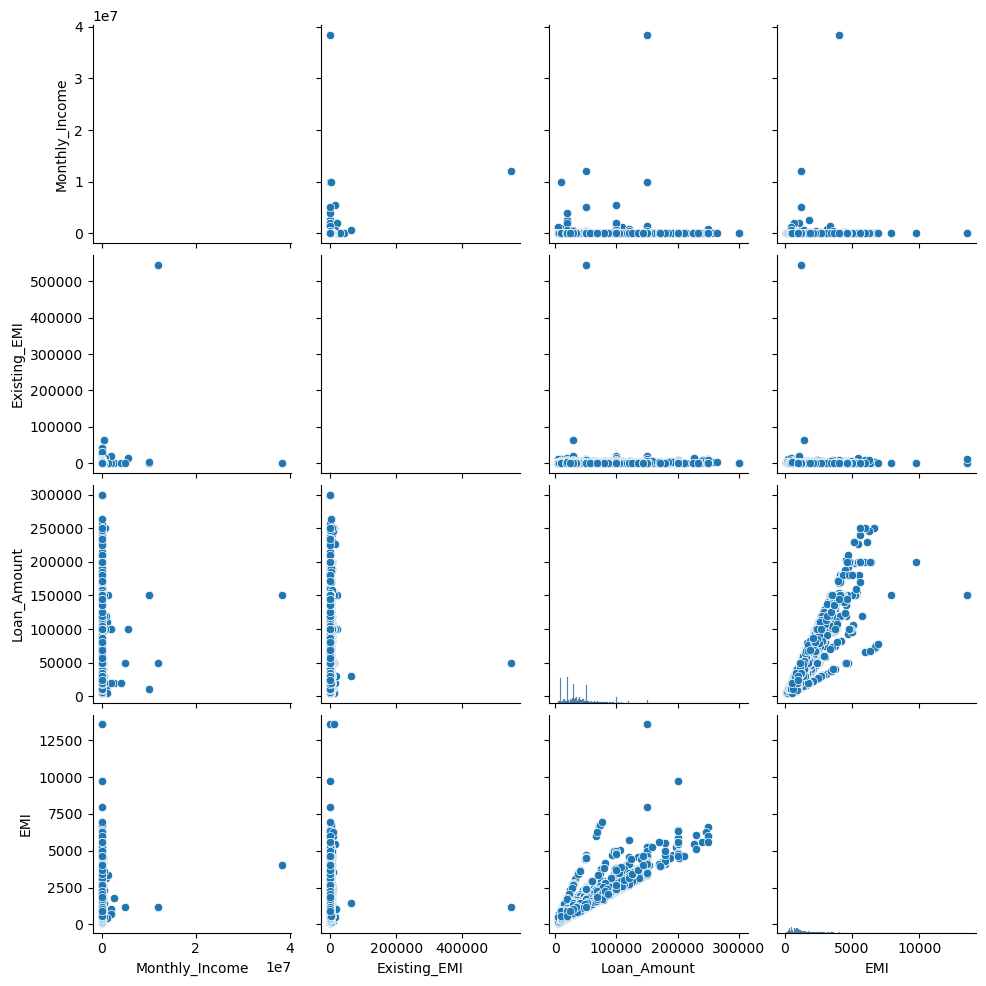

In [5]:
continuous_feats = df_train[['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'EMI']]
sns.pairplot(data=continuous_feats)
plt.show()

array([[<Axes: title={'center': 'Employer_Category2'}>,
        <Axes: title={'center': 'Monthly_Income'}>,
        <Axes: title={'center': 'Existing_EMI'}>],
       [<Axes: title={'center': 'Loan_Amount'}>,
        <Axes: title={'center': 'Loan_Period'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'EMI'}>,
        <Axes: title={'center': 'Var1'}>,
        <Axes: title={'center': 'Approved'}>]], dtype=object)

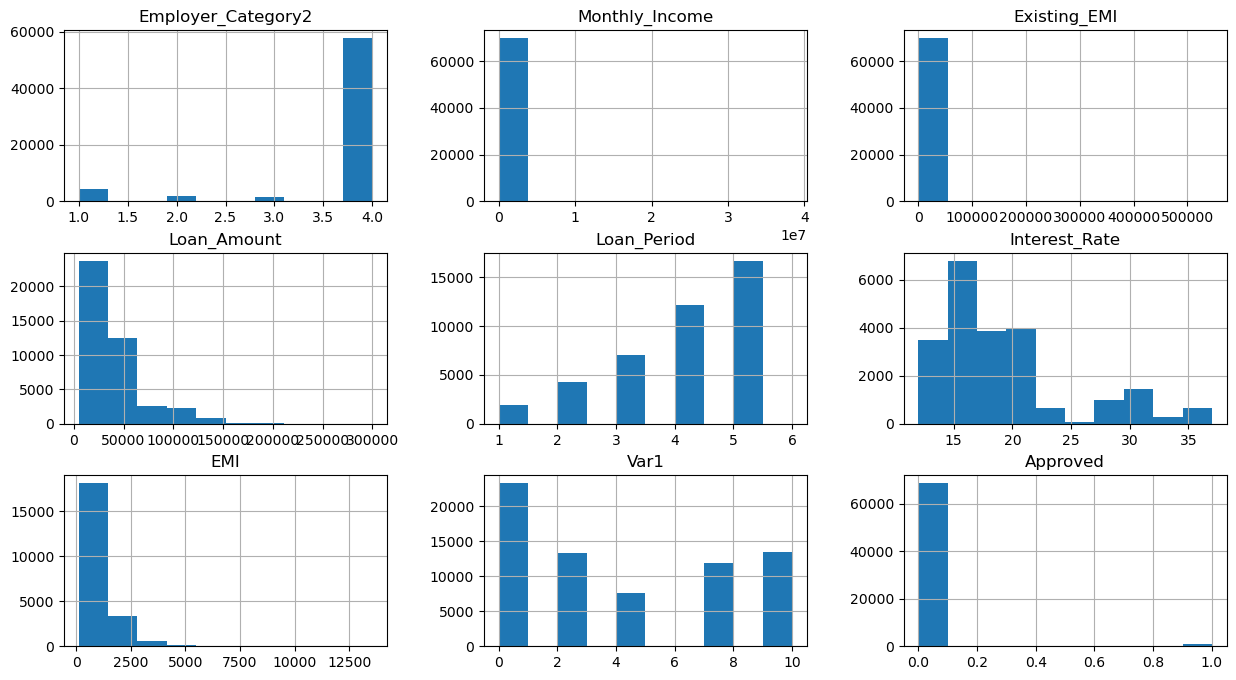

In [6]:
df_train.hist(figsize=(15, 8))

<Axes: >

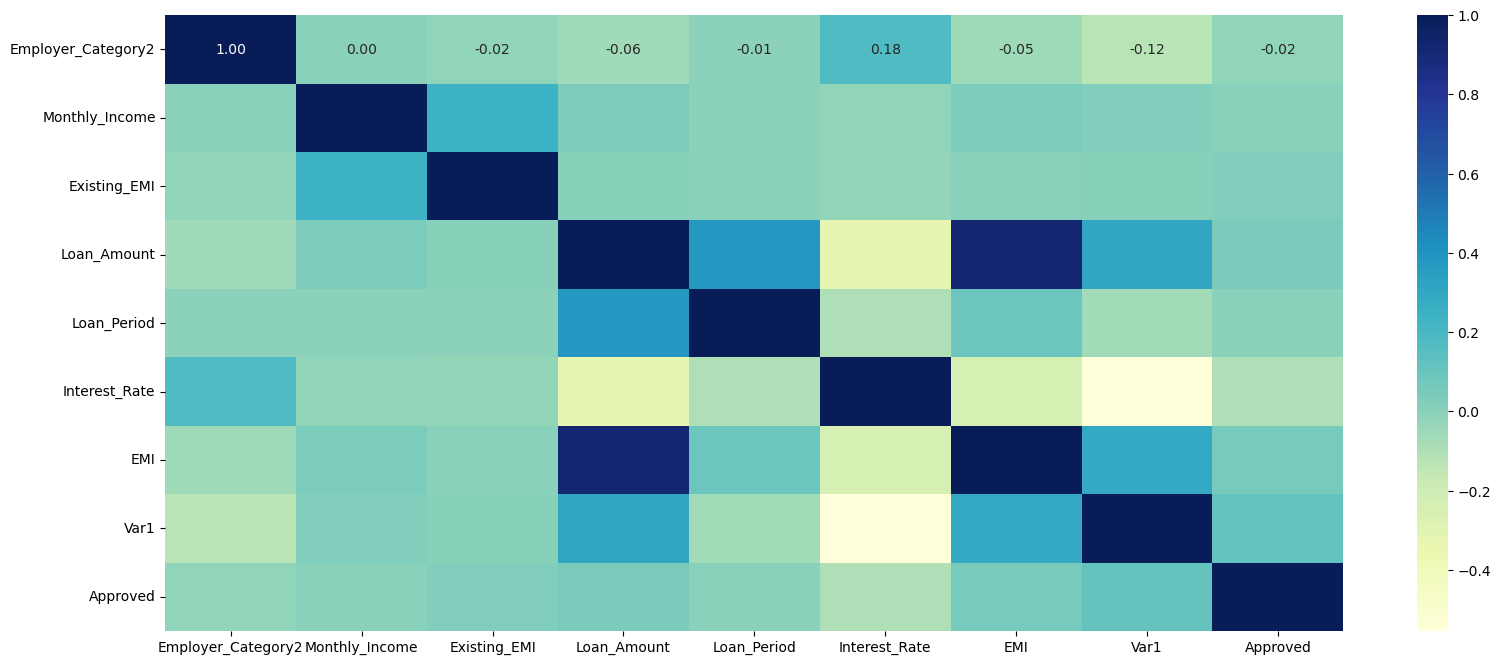

In [7]:
numeric_df_train = df_train.select_dtypes(include=[np.number])
plt.figure(figsize=(19, 8))
sns.heatmap(numeric_df_train.corr(), annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={'size': 10})

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


In [9]:
df_train.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [10]:
df_train.isna().any(axis=1).sum()

49405

In [11]:
income_outliers = df_train[df_train['Monthly_Income'] > 150000].shape
income_outliers

(56, 22)

In [12]:
df_train_1 = df_train[df_train['Monthly_Income'] < 150000]

In [13]:
df_train_1.shape

(69656, 22)

In [14]:
income_outliers = df_train_1[df_train_1['Monthly_Income'] > 60000].shape
income_outliers

(93, 22)

In [15]:
df_train_2 = df_train[df_train['Monthly_Income'] < 60000]

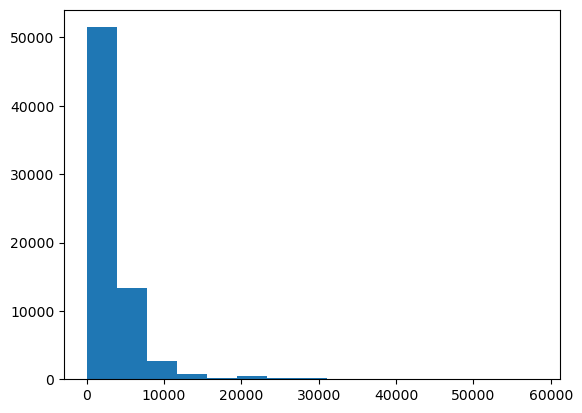

In [16]:
plt.hist(x=df_train_2['Monthly_Income'], bins=15)
plt.show()

## 1. Remove outliers from Monthly_Income by removing rows with Monthly_Income above 20,000. 

In [94]:
df_train_2_5 = df_train_2.copy()
df_train_2_5_numeric = df_train-2_5[['']]

In [97]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_train_2_5_scaled_income = ss.fit_transform(df_train_2_5['Monthly_Income'])
df_train_2_5_scaled_income.hist()

ValueError: Expected 2D array, got 1D array instead:
array=[2000. 3500. 2250. ... 1600. 9893. 4230.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
df_train_3 = df_train[df_train['Monthly_Income'] < 20000]

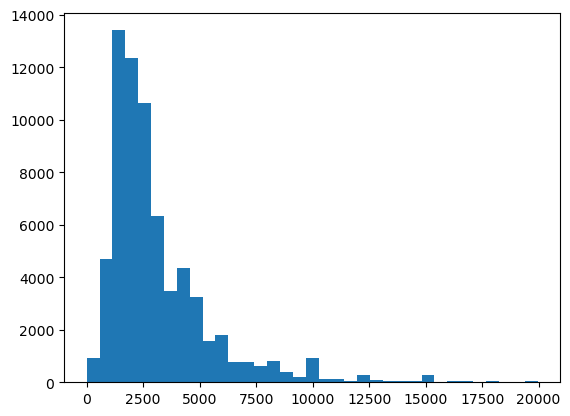

In [18]:
plt.hist(x=df_train_3['Monthly_Income'], bins=35)
plt.show()

In [19]:
df_train_3.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           4001
Employer_Category1                      4001
Employer_Category2                      4271
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9275
Primary_Bank_Type                       9275
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                            27528
Loan_Period                            27528
Interest_Rate                          46813
EMI                                    46813
Var1                                       0
Approved                                   0
dtype: int

## 2. Convert DOB to datetime format. 

In [20]:
df_train_3['DOB'] = pd.to_datetime(df_train_3['DOB'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

C:\Users\zive9\AppData\Local\Temp\ipykernel_17860\3464313117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['DOB'] = pd.to_datetime(df_train_3['DOB'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')


## 3. Converted Lead_Creation_Date to datetime format. 

In [21]:
df_train_3['Lead_Creation_Date'] = pd.to_datetime(df_train_3['Lead_Creation_Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

C:\Users\zive9\AppData\Local\Temp\ipykernel_17860\4135966100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['Lead_Creation_Date'] = pd.to_datetime(df_train_3['Lead_Creation_Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')


In [22]:
df_train_3.head(5)

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


## 4. Added DOB_Year column. 

In [23]:
df_train_3['DOB_Year'] = df_train_3['DOB'].str[:4]

C:\Users\zive9\AppData\Local\Temp\ipykernel_17860\336185426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['DOB_Year'] = df_train_3['DOB'].str[:4]


# 5. Removed DOB rows with NaN. 

In [24]:
df_train_4 = df_train_3.dropna(subset=['DOB'])
df_train_4.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           3986
Employer_Category1                      3986
Employer_Category2                      4256
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9260
Primary_Bank_Type                       9260
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                            27513
Loan_Period                            27513
Interest_Rate                          46798
EMI                                    46798
Var1                                       0
Approved                                   0
DOB_Year  

## 6. Dropped Interest_Rate and EMI columns

In [25]:
df_train_5 = df_train_4.drop(['EMI', 'Interest_Rate'], axis=1)

In [26]:
df_train_5.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           3986
Employer_Category1                      3986
Employer_Category2                      4256
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9260
Primary_Bank_Type                       9260
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                            27513
Loan_Period                            27513
Var1                                       0
Approved                                   0
DOB_Year                                   0
dtype: int64

In [27]:
df_train_5[['Loan_Amount', 'Loan_Period']].describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount,41027.0,38493.748020,28917.745000,5000.0,20000.0,30000.0,50000.0,300000.0
Loan_Period,41027.0,3.890657,1.166443,1.0,3.0,4.0,5.0,6.0


array([[<Axes: title={'center': 'Loan_Amount'}>,
        <Axes: title={'center': 'Loan_Period'}>],
       [<Axes: title={'center': 'Existing_EMI'}>, <Axes: >]], dtype=object)

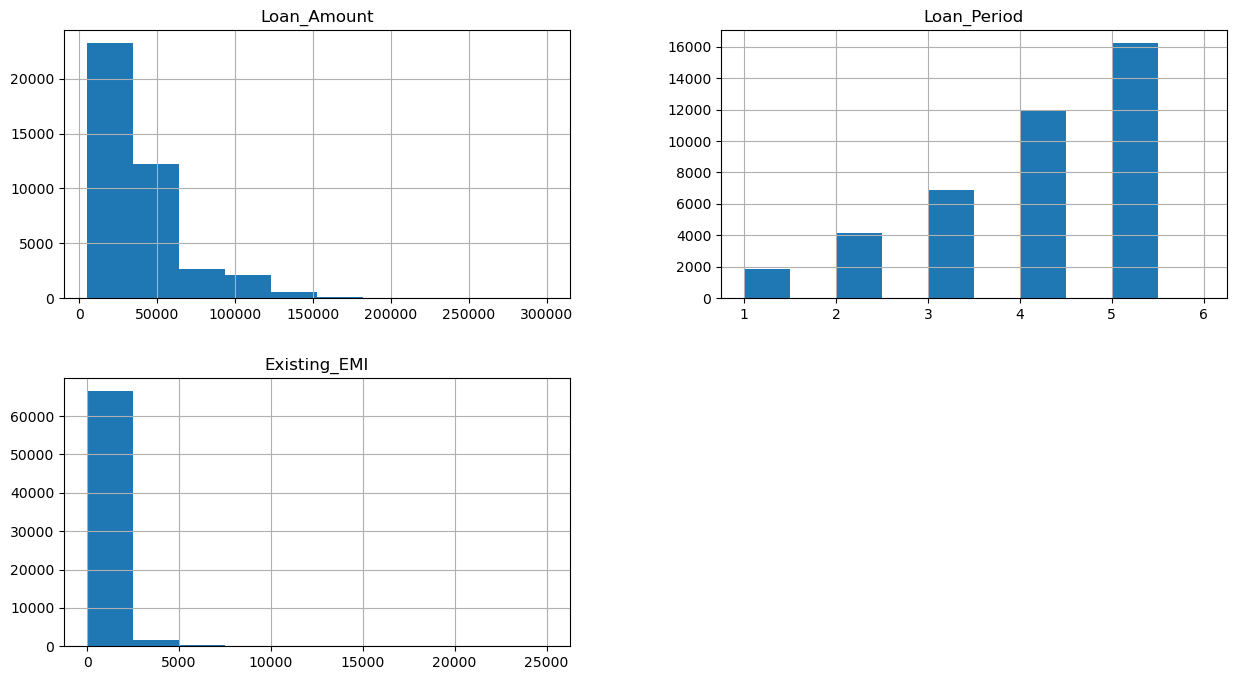

In [28]:
df_train_5[['Loan_Amount', 'Loan_Period', 'Existing_EMI']].hist(figsize=(15, 8))

## 7. Impute Loan_Amount, Loan_Period and Existing_EMI with median

In [29]:
df_train_6 = df_train_5.copy()
loan_amount_mode = df_train_6['Loan_Amount'].median()
df_train_6['Loan_Amount'].fillna(loan_amount_mode, inplace=True)

In [30]:
df_train_6.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                799
City_Category                            799
Employer_Code                           3986
Employer_Category1                      3986
Employer_Category2                      4256
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9260
Primary_Bank_Type                       9260
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              50
Loan_Amount                                0
Loan_Period                            27513
Var1                                       0
Approved                                   0
DOB_Year                                   0
dtype: int64

In [31]:
df_train_7 = df_train_6.copy()
loan_period_mode = df_train_7['Loan_Period'].median()
df_train_7['Loan_Period'].fillna(loan_period_mode, inplace=True)

In [32]:
df_train_7.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               799
City_Category                           799
Employer_Code                          3986
Employer_Category1                     3986
Employer_Category2                     4256
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code    9260
Primary_Bank_Type                      9260
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                             50
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
DOB_Year                                  0
dtype: int64

In [33]:
df_train_8 = df_train_7.copy()
existing_emi_mode = df_train_8['Existing_EMI'].median()
df_train_8['Existing_EMI'].fillna(existing_emi_mode, inplace=True)

In [34]:
df_train_8.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               799
City_Category                           799
Employer_Code                          3986
Employer_Category1                     3986
Employer_Category2                     4256
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code    9260
Primary_Bank_Type                      9260
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
DOB_Year                                  0
dtype: int64

In [35]:
df_train_8[['Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type']].value_counts()

Customer_Existing_Primary_Bank_Code  Primary_Bank_Type
B001                                 P                    13965
B002                                 P                    10698
B003                                 G                     9345
B004                                 P                     6944
B005                                 P                     1886
B006                                 P                     1627
B007                                 G                     1219
B008                                 G                      926
B009                                 G                      926
B010                                 G                      898
B012                                 G                      777
B013                                 G                      774
B011                                 P                      765
B014                                 P                      599
B015                                 P           

## 8. Impute Customer_Existing_Primary_Bank_Code and Primary_Bank_Type with mode

In [36]:
df_train_9 = df_train_8.copy()
existing_bank_mode = df_train_9['Customer_Existing_Primary_Bank_Code'].mode()[0]
df_train_9['Customer_Existing_Primary_Bank_Code'].fillna(existing_bank_mode, inplace=True)

In [37]:
df_train_9.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               799
City_Category                           799
Employer_Code                          3986
Employer_Category1                     3986
Employer_Category2                     4256
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code       0
Primary_Bank_Type                      9260
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
DOB_Year                                  0
dtype: int64

In [38]:
df_train_10 = df_train_9.copy()
primary_bank_mode = df_train_10['Primary_Bank_Type'].mode()[0]
df_train_10['Primary_Bank_Type'].fillna(primary_bank_mode, inplace=True)

In [39]:
df_train_10.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               799
City_Category                           799
Employer_Code                          3986
Employer_Category1                     3986
Employer_Category2                     4256
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code       0
Primary_Bank_Type                         0
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
DOB_Year                                  0
dtype: int64

array([[<Axes: title={'center': 'Employer_Category2'}>,
        <Axes: title={'center': 'Monthly_Income'}>,
        <Axes: title={'center': 'Existing_EMI'}>],
       [<Axes: title={'center': 'Loan_Amount'}>,
        <Axes: title={'center': 'Loan_Period'}>,
        <Axes: title={'center': 'Var1'}>],
       [<Axes: title={'center': 'Approved'}>, <Axes: >, <Axes: >]],
      dtype=object)

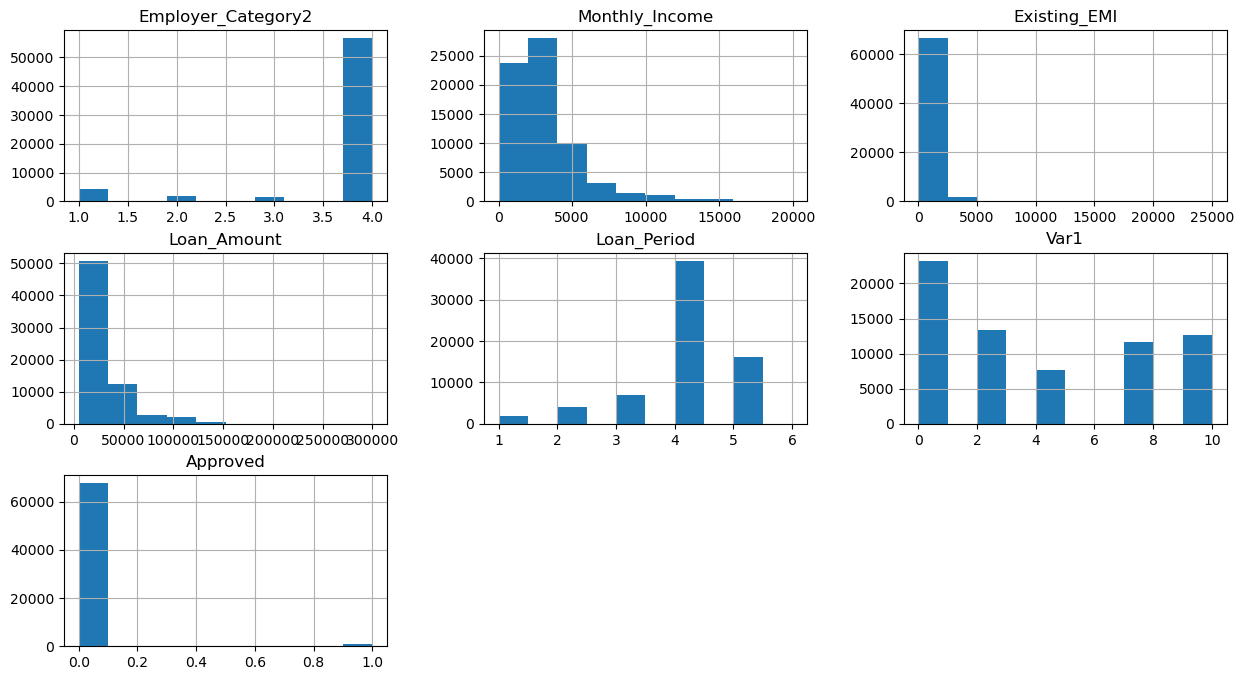

In [40]:
df_train_10.hist(figsize=(15, 8))

In [44]:
np.round((df_train_10.isnull().mean()*100), 2)

ID                                     0.00
Gender                                 0.00
DOB                                    0.00
Lead_Creation_Date                     0.00
City_Code                              1.17
City_Category                          1.17
Employer_Code                          5.82
Employer_Category1                     5.82
Employer_Category2                     6.21
Monthly_Income                         0.00
Customer_Existing_Primary_Bank_Code    0.00
Primary_Bank_Type                      0.00
Contacted                              0.00
Source                                 0.00
Source_Category                        0.00
Existing_EMI                           0.00
Loan_Amount                            0.00
Loan_Period                            0.00
Var1                                   0.00
Approved                               0.00
DOB_Year                               0.00
dtype: float64

## 9. Remove rows which have missing City_Code and City_Category values

In [55]:
df_train_11 = df_train_10.copy()

df_train_11 = df_train_11.dropna(axis=0, how='any', subset=['City_Code', 'City_Category'])
df_train_11.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                                 0
City_Category                             0
Employer_Code                          3536
Employer_Category1                     3536
Employer_Category2                     3806
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code       0
Primary_Bank_Type                         0
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
DOB_Year                                  0
dtype: int64

In [64]:
print(df_train_11['Employer_Code'].value_counts())
print("Uniques: ",df_train_11['Employer_Code'].nunique())
print(df_train_11['Employer_Category1'].value_counts())
print("Uniques: ",df_train_11['Employer_Category1'].nunique())
print(df_train_11['Employer_Category2'].value_counts())

Employer_Code
COM0000002    448
COM0000003    315
COM0000004    256
COM0000005    236
COM0000006    193
             ... 
COM0048958      1
COM0026417      1
COM0014848      1
COM0045294      1
COM0045789      1
Name: count, Length: 35872, dtype: int64
Uniques:  35872
Employer_Category1
A    32480
B    17696
C    14029
Name: count, dtype: int64
Uniques:  3
Employer_Category2
4.0    56269
1.0     4156
2.0     1917
3.0     1593
Name: count, dtype: int64


## 10. Impute missing Employer_Code, Employer_Category1 and Employer_Category2 with the mode

In [66]:
df_train_12 = df_train_11.copy()
emp_code_mode, emp_cat1_mode, emp_cat2_mode = df_train_12['Employer_Code'].mode()[0], df_train_12['Employer_Category1'].mode()[0], df_train_12['Employer_Category2'].mode()[0]
df_train_12['Employer_Code'].fillna(emp_code_mode, inplace=True)
df_train_12['Employer_Category1'].fillna(emp_cat1_mode, inplace=True)
df_train_12['Employer_Category2'].fillna(emp_cat2_mode, inplace=True)

In [68]:
np.round(df_train_12.isnull().mean()*100, 2)

ID                                     0.0
Gender                                 0.0
DOB                                    0.0
Lead_Creation_Date                     0.0
City_Code                              0.0
City_Category                          0.0
Employer_Code                          0.0
Employer_Category1                     0.0
Employer_Category2                     0.0
Monthly_Income                         0.0
Customer_Existing_Primary_Bank_Code    0.0
Primary_Bank_Type                      0.0
Contacted                              0.0
Source                                 0.0
Source_Category                        0.0
Existing_EMI                           0.0
Loan_Amount                            0.0
Loan_Period                            0.0
Var1                                   0.0
Approved                               0.0
DOB_Year                               0.0
dtype: float64

In [69]:
df_clean = df_train_12.copy()

In [70]:
df_clean.dtypes

ID                                      object
Gender                                  object
DOB                                     object
Lead_Creation_Date                      object
City_Code                               object
City_Category                           object
Employer_Code                           object
Employer_Category1                      object
Employer_Category2                     float64
Monthly_Income                         float64
Customer_Existing_Primary_Bank_Code     object
Primary_Bank_Type                       object
Contacted                               object
Source                                  object
Source_Category                         object
Existing_EMI                           float64
Loan_Amount                            float64
Loan_Period                            float64
Var1                                     int64
Approved                                 int64
DOB_Year                                object
dtype: object

In [72]:
df_clean.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,APPC90493171225,APPD40611263344,APPE70289249423,APPF80273865537,APPG60994436641,APPI90914237819,APPK80327232033,APPL20820172146,APPM30977401211,APPN60714112334
Gender,Female,Male,Male,Male,Male,Female,Male,Female,Male,Female
DOB,1979-07-23,1986-12-07,1982-12-10,1989-01-30,1985-04-19,1988-12-23,1973-03-28,1990-11-12,1977-03-03,1990-12-13
Lead_Creation_Date,2016-07-15,2016-07-04,2016-07-19,2016-07-09,2016-07-20,2016-07-01,2016-07-02,2016-07-03,2016-07-02,2016-07-02
City_Code,C10001,C10003,C10125,C10477,C10002,C10402,C10022,C10003,C10003,C10014
City_Category,A,A,C,C,A,C,B,A,A,B
Employer_Code,COM0044082,COM0000002,COM0005267,COM0004143,COM0001781,COM0007740,COM0030526,COM0016738,COM0010626,COM0042212
Employer_Category1,A,C,C,A,A,A,B,A,A,A
Employer_Category2,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Monthly_Income,2000.0,3500.0,2250.0,3500.0,10000.0,7000.0,7500.0,3000.0,2500.0,2500.0


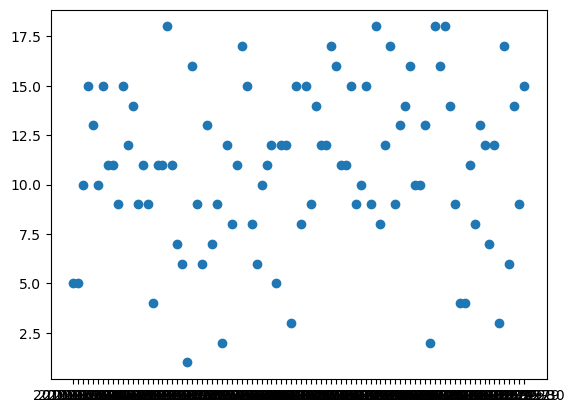

In [93]:
approvals = df_clean[['Lead_Creation_Date', 'Approved']].groupby(by=['Lead_Creation_Date'], as_index=False).sum()
plt.scatter(x=approvals['Lead_Creation_Date'], y=approvals['Approved'])
# plt.bar(x=approvals[0], height = approvals[0].max())
# plt.show()